In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
#Load the csv file: breast-cancer-wisconsin. 
data = pd.read_csv('breast-cancer-wisconsin.csv',names=['id','clump','cell_size','cell_shape','adhesion','epithelial','nuclei','chromatin','nucleoli','mitoses','class'], na_values='?')

# Replace null values "?" by numpy.NaN
data = data.replace("?", np.NaN)
data.shape

(699, 11)

In [7]:
#Check if there are duplicates. If so, remove them.
isDuplicatePresent = data.duplicated().any()
print(isDuplicatePresent)

True


In [8]:
if (isDuplicatePresent):
    data = data.drop_duplicates()

In [9]:
data.shape

(691, 11)

In [10]:
# eight duplicates values were removed

In [11]:
# Fill null values with mean value of the respective column
print(data.isnull().sum())
data["nuclei"] = data["nuclei"].fillna(round(data["nuclei"].median(),2))

id             0
clump          0
cell_size      0
cell_shape     0
adhesion       0
epithelial     0
nuclei        16
chromatin      0
nucleoli       0
mitoses        0
class          0
dtype: int64


In [12]:
data

,id,clump,cell_size,cell_shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


<AxesSubplot:>

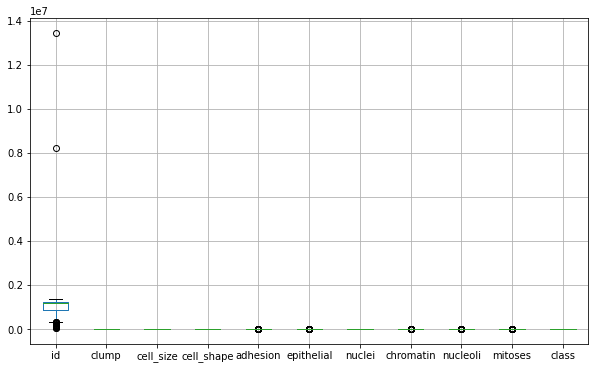

In [13]:
data.boxplot(figsize = (10, 6))

<AxesSubplot:>

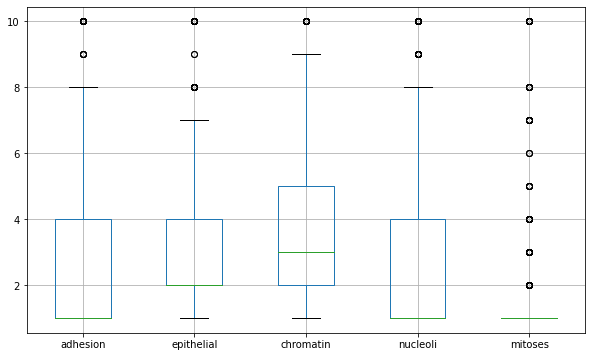

In [14]:
data[['adhesion','epithelial','chromatin','nucleoli','mitoses']].boxplot(figsize = (10, 6))

<AxesSubplot:>

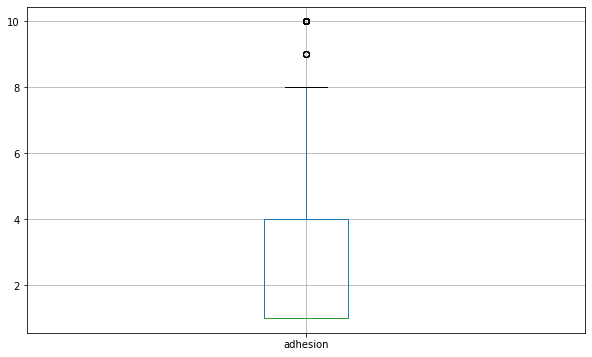

In [15]:
#iternation 1 for adhesion
Q1 =data.adhesion.quantile(0.25)
Q3 =data.adhesion.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 3*IQR
UM =Q3 + 3*IQR
LM,UM
data=data[(data.adhesion>LM)&(data.adhesion<UM)]
data[['adhesion']].boxplot(figsize = (10, 6))


In [16]:
data.shape

(691, 11)

(631, 11)

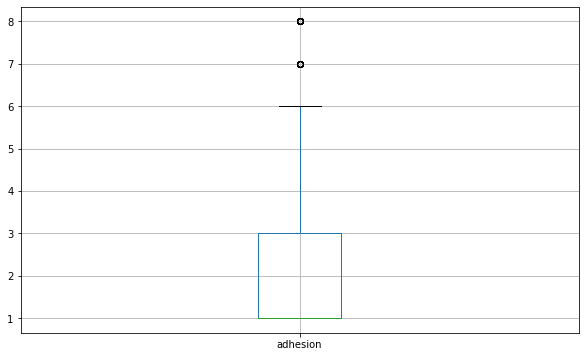

In [17]:
#iternation 2 for adhesion
Q1 =data.adhesion.quantile(0.25)
Q3 =data.adhesion.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
data=data[(data.adhesion>LM)&(data.adhesion<UM)]
data[['adhesion']].boxplot(figsize = (10, 6))
data.shape

(528, 11)

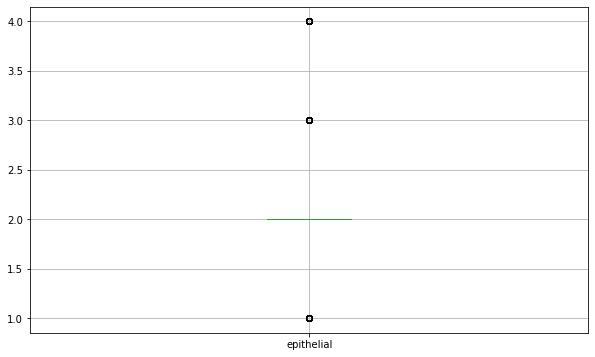

In [18]:
#epithelial iternation 2
Q1 =data.epithelial.quantile(0.25)
Q3 =data.epithelial.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
data=data[(data.epithelial>LM)&(data.epithelial<UM)]
data[['epithelial']].boxplot(figsize = (10, 6))
data.shape

(478, 11)

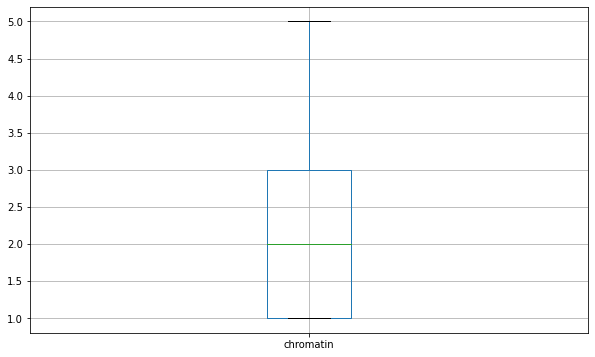

In [19]:
#chromatin iternation 1
Q1 =data.chromatin.quantile(0.25)
Q3 =data.chromatin.quantile(0.75)
Q1,Q3
IQR=Q3-Q1
IQR
LM =Q1 - 1.5*IQR
UM =Q3 + 1.5*IQR
LM,UM
data=data[(data.chromatin>LM)&(data.chromatin<UM)]
data[['chromatin']].boxplot(figsize = (10, 6))
data.shape

In [20]:
cleaned_data = data

<AxesSubplot:>

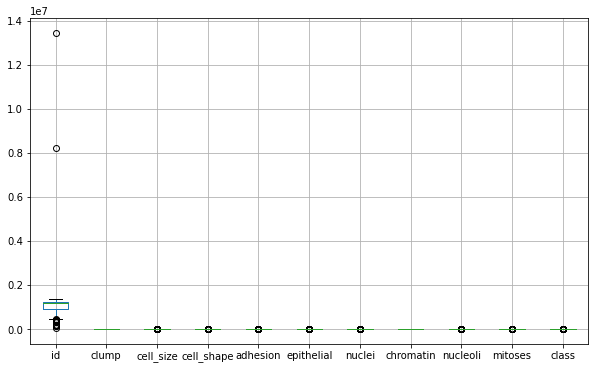

In [21]:
data.boxplot(figsize = (10, 6))

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import KFold 
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

features = list(cleaned_data.columns[:9])
features


['id',
 'clump',
 'cell_size',
 'cell_shape',
 'adhesion',
 'epithelial',
 'nuclei',
 'chromatin',
 'nucleoli']

In [23]:
y = cleaned_data["class"]
x = cleaned_data[features]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [25]:
# Model created ad trained

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [26]:
#predict the response

y_pred = clf.predict(x_test)

In [27]:
# Print accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9416666666666667


In [28]:
model = svm.SVC()

In [29]:
accuracy = cross_val_score(model,x,y,scoring='accuracy', cv=10)

In [ ]:
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean())